In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_curve

In [2]:
vrc_reactivity = pd.read_table("../data/VRC_reactivity_ebv.csv", sep=",", index_col = 0)
tile_anno = pd.read_csv("../data/ebv_peptides.tsv", sep='\t', index_col = 0)
with open('../data/ebv_peptide_probabilities.json') as json_file:
    rf_probabilities = json.load(json_file)

In [3]:
vrc_reactivity["min 2 sample reactive"].value_counts()

0    1254
1    1009
Name: min 2 sample reactive, dtype: int64

In [4]:
def scoring_tile(pred_vec_rf):
    v = np.array(pred_vec_rf)          
    return(np.mean(v))

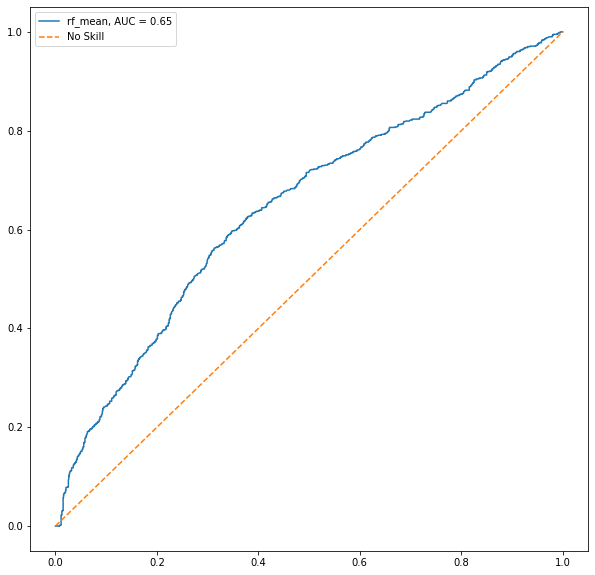

In [5]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

cutoff_minsamplesVRC = 2

comp_df_t = pd.DataFrame({"VRC reactive" : [vrc_reactivity.loc[k,"reactive samples"] >= cutoff_minsamplesVRC for k in rf_probabilities.keys()]})
comp_df_t["VRC reactive"] = comp_df_t["VRC reactive"].astype(int)
fig_roc, ax_roc = plt.subplots()
score_label = "rf_mean"
comp_df_t[score_label] = [scoring_tile(rf_probabilities[k]) for k in rf_probabilities.keys()]
fpr, tpr, _ = roc_curve(comp_df_t["VRC reactive"], comp_df_t[score_label])
auc_score = round(metrics.roc_auc_score(comp_df_t["VRC reactive"], comp_df_t[score_label]) ,2)       
ax_roc.plot(fpr, tpr, label=score_label + ", AUC = " + str(auc_score))
ax_roc.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.ylim([-0.05, 1.05])
ax_roc.legend()
plt.show()